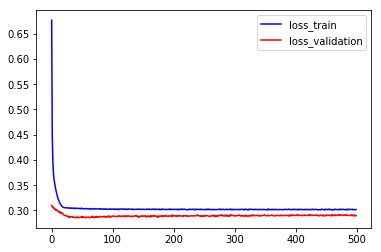

In [1]:
import numpy as np
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.linalg.misc import norm
import matplotlib.pyplot as plt
from numpy import *

#数据读取和分割
data = load_svmlight_file("australian.txt")
x = data[0]
y = data[1]
x = x.toarray()
y = y.T
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)

#学习率、C、权重的设置
rating = 0.01
C = 1000
weight = np.ones(15)

#训练集和测试集的长度
train_length = int(x_train.size/14)
test_length = int(x_test.size/14)

#测试集和训练集的截距设置
weight0  = np.ones(train_length)
weight1  = np.ones(test_length)
x_train = np.column_stack([x_train,weight0])
x_test = np.column_stack([x_test,weight1])

#训练集和测试集的loss数组
loss_train = np.array([])
loss_test = np.array([])

#定义分类器
def svm_classification(x,y,length,weight,rating,C,number,loss):
    for i in range(number):
        temp = 0
        max_value = 0
        for j in range(length):
            #判断max(0,1(y*(w*x+b)))
            alpha = 1 - np.dot(y[j],np.dot(weight.T,x[j].T))
            if(alpha <= 0):
                gradient =  1/C * weight
            if(alpha > 0):
                gradient = 1/C *weight -  np.dot(x[j].T,y[j])
                max_value = max_value + alpha
            weight =  weight - rating * gradient
            y_p = np.dot(weight.T,x[j].T)
            #验证预测结果(阈值设定)
            if(y_p >= 1):
                y_predict = 1.0
            if(y_p <= -1):
                y_predict = -1.0
            if(y_predict == y[j]):
                temp = temp + 1
        #准确率
        #print("准确率：")
        #print(temp/length)
        #loss计算
        loss = np.append(loss,np.dot(weight,weight)/2 + max_value)
    return loss/length,weight

#训练和测试
loss_train,weight = svm_classification(x_train,y_train,train_length,weight,rating,C,500,loss_train)
loss_test,weight = svm_classification(x_test,y_test,test_length,weight,rating,C,500,loss_test)

#图显示
plt.figure()
#蓝色的为训练集，红色的为测试集
plt.plot(loss_train,'blue',label='loss_train')
plt.plot(loss_test,'red',label='loss_validation')
plt.legend()
plt.show()
